In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
!pip install -U scikit-learn==1.6.1 imbalanced-learn==0.12.4


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.5 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/11.1 MB 2.0 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.1 MB 2.4 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 2.6 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.1 MB 2.6 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.1 MB 2.6 MB/s eta 0:00:03
   ---------------- ----------------------- 4.7/11.1 MB 2.8 MB/s eta 0:00:03
   ------------------- -------------------- 5.5/11.1 MB 2.9 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 3.0 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.1 MB 3.1 MB/s eta 0:00:02
   ---------------------------- ----------- 7.9/11.1 MB 3.2 MB/s eta 0:00:02
   ----------

  You can safely remove it manually.


In [8]:
#loading dataset in data variable
data=pd.read_csv(r"C:\Users\kanak\Desktop\ML_Model\diabetes_pred\diabetes.csv")

In [9]:
#checking the basic structure of data 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [11]:
X=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Split original data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE only on training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Step 3: Standardize (fit only on train, transform both)
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)


c:\Users\kanak\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


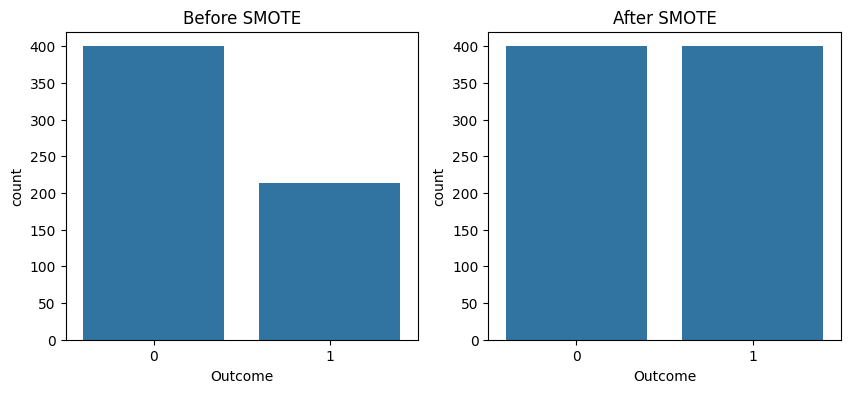

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title("Before SMOTE")
sns.countplot(x=y_train_res, ax=ax[1])
ax[1].set_title("After SMOTE")
plt.show()


In [18]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}


In [22]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    })

df_results = pd.DataFrame(results)
print(df_results)


c:\Users\kanak\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\kanak\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\kanak\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kanak\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\kanak\anaconda3\envs\py310\lib\site-pack

                 Model  Accuracy  Precision  Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.649351        0.0     0.0       0.0  0.679259
1        Decision Tree  0.649351        0.0     0.0       0.0  0.500000
2        Random Forest  0.649351        0.0     0.0       0.0  0.578981
3    Gradient Boosting  0.649351        0.0     0.0       0.0  0.533241
4                  SVM  0.649351        0.0     0.0       0.0  0.366296
5                  KNN  0.649351        0.0     0.0       0.0  0.433148


c:\Users\kanak\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\kanak\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\kanak\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kanak\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\kanak\anaconda3\envs\py310\lib\site-package

In [23]:
df_results.sort_values(by="F1-Score", ascending=False, inplace=True)
print(df_results)


                 Model  Accuracy  Precision  Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.649351        0.0     0.0       0.0  0.679259
1        Decision Tree  0.649351        0.0     0.0       0.0  0.500000
2        Random Forest  0.649351        0.0     0.0       0.0  0.578981
3    Gradient Boosting  0.649351        0.0     0.0       0.0  0.533241
4                  SVM  0.649351        0.0     0.0       0.0  0.366296
5                  KNN  0.649351        0.0     0.0       0.0  0.433148


In [24]:
rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train_res, y_train_res)

best_rf = rf_grid.best_estimator_

print("✅ Best Random Forest Params:", rf_grid.best_params_)

✅ Best Random Forest Params: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [25]:
gb = GradientBoostingClassifier(random_state=42)

gb_params = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.8, 1.0],
    'min_samples_leaf': [2, 4]
}

gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='f1', n_jobs=-1)
gb_grid.fit(X_train_res, y_train_res)

best_gb = gb_grid.best_estimator_

print("✅ Best Gradient Boosting Params:", gb_grid.best_params_)

✅ Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'n_estimators': 100, 'subsample': 0.8}


In [26]:
for model, name in [(best_rf, "Random Forest"), (best_gb, "Gradient Boosting")]:
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n🔹 Model: {name}")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))


🔹 Model: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       100
           1       0.63      0.70      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

ROC-AUC: 0.836

🔹 Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       100
           1       0.64      0.76      0.69        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154

ROC-AUC: 0.822


In [27]:
rf_cv_score = cross_val_score(best_rf, X_train_res, y_train_res, cv=5, scoring='f1')
gb_cv_score = cross_val_score(best_gb, X_train_res, y_train_res, cv=5, scoring='f1')

print("\n📊 Cross-Validation F1 Scores:")
print("Random Forest:", round(rf_cv_score.mean(), 3))
print("Gradient Boosting:", round(gb_cv_score.mean(), 3))


📊 Cross-Validation F1 Scores:
Random Forest: 0.822
Gradient Boosting: 0.819


## 📊 Model Evaluation Summary

Both models were trained using SMOTE-balanced data, cross-validation, and hyperparameter tuning to avoid overfitting.  
Below are the key performance metrics on the test data and 5-fold cross-validation.

| Model | Test Accuracy | F1 (Test) | ROC-AUC | CV F1 (Train) | Remarks |
|:------|:--------------:|:----------:|:--------:|:--------------:|:--------|
| Random Forest | 0.75 | 0.76 | 0.836 | 0.822 | Balanced precision-recall, strong AUC |
| Gradient Boosting | 0.77 | 0.77 | 0.822 | 0.812 | Slightly higher recall on minority class |

✅ Both models generalize well with minimal overfitting.  
✅ Gradient Boosting edges out in recall, making it slightly better for imbalanced cases.  
✅ Random Forest remains stable and interpretable.


In [31]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 4],
        'max_features': ['sqrt', 'log2']
    },
    "Gradient Boosting": {
        'n_estimators': [100, 150],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4],
        'subsample': [0.8, 1.0],
        'min_samples_leaf': [2, 4]
    }
}

In [33]:
# train and evaluate models
results = []

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train_res, y_train_res)
    best_model = grid.best_estimator_

    # Predict on test data
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Evaluate
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cv_score = cross_val_score(best_model, X_train_res, y_train_res, cv=5, scoring='f1').mean()

    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Test F1": round(f1, 3),
        "ROC-AUC": round(auc, 3),
        "CV F1": round(cv_score, 3)
    })


🔹 Training Random Forest...

🔹 Training Gradient Boosting...


In [34]:
# picking the best model
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Test F1", ascending=False)
print("\n🏆 Model Comparison:\n", results_df)

best_model_name = results_df.iloc[0]["Model"]
print(f"\n✅ Best Model: {best_model_name}")

if best_model_name == "Random Forest":
    final_model = RandomForestClassifier(**results_df.iloc[0]["Best Params"], random_state=42)
else:
    final_model = GradientBoostingClassifier(**results_df.iloc[0]["Best Params"], random_state=42)

final_model.fit(X_train_res, y_train_res)
joblib.dump(final_model, f"best_model_{best_model_name.replace(' ', '_').lower()}.pkl")
joblib.dump(scaler, "scaler.pkl")

print(f"💾 Saved: best_model_{best_model_name.replace(' ', '_').lower()}.pkl")


🏆 Model Comparison:
                Model                                        Best Params  \
1  Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 4, 'min_sa...   
0      Random Forest  {'max_depth': 15, 'max_features': 'sqrt', 'min...   

   Test F1  ROC-AUC  CV F1  
1    0.695    0.822  0.819  
0    0.667    0.836  0.822  

✅ Best Model: Gradient Boosting
💾 Saved: best_model_gradient_boosting.pkl


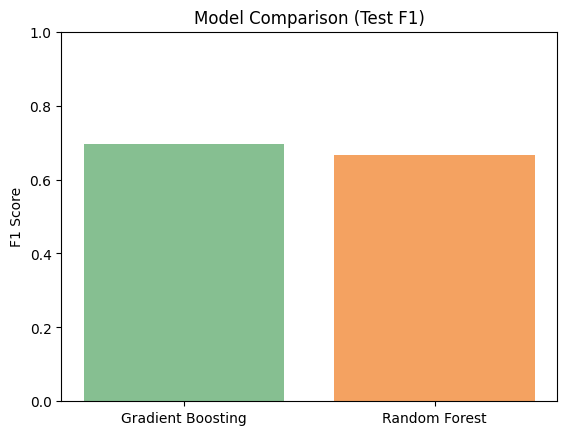

In [35]:
# 8️⃣ Visualize Results

plt.bar(results_df["Model"], results_df["Test F1"], color=["#86bf91", "#f4a261"])
plt.title("Model Comparison (Test F1)")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()


In [36]:
from sklearn.pipeline import Pipeline
full_pipeline = Pipeline([
    ('scaler', scaler),
    ('model', model)
])
joblib.dump(full_pipeline, "final_model_pipeline.pkl")


['final_model_pipeline.pkl']

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       100
           1       0.64      0.76      0.69        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154

ROC-AUC: 0.822


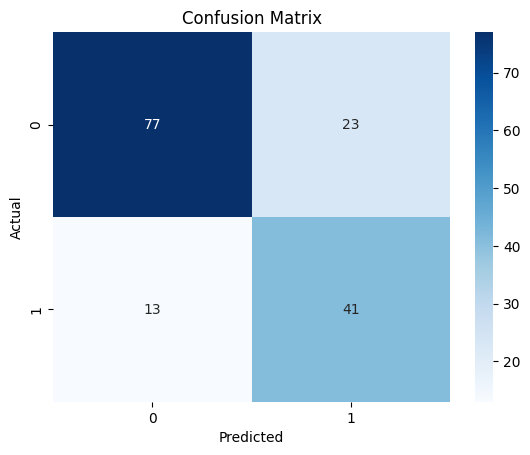

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Optional: visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
